In [1]:
import torch
import os
import random
import shutil
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

data_dir = r"D:\Downloads\Datasets\Imbalanced_dataste_split"

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=train_transform)
val_data = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=test_transform)
test_data = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=test_transform)

train_loader = DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)
val_loader = DataLoader(val_data, batch_size=4, shuffle=False, num_workers=2)
test_loader = DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)

print(f"Classes: {train_data.classes}")
print(f"Train size: {len(train_data)}, Val size: {len(val_data)}, Test size: {len(test_data)}")


Classes: ['Bear', 'Brown bear', 'Butterfly', 'Camel', 'Canary', 'Caterpillar', 'Cats', 'Cattle', 'Centipede', 'Cheetah', 'Chicken', 'Crab', 'Crocodile', 'Deer', 'Dogs', 'Duck', 'Eagle', 'Elephant', 'Fish', 'Fox', 'Frog', 'Giraffe', 'Goat', 'Goldfish', 'Goose', 'Hamster', 'Harbor seal', 'Hedgehog', 'Hippopotamus', 'Horse', 'Jaguar', 'Jellyfish', 'Kangaroo', 'Koala', 'Ladybug', 'Leopard', 'Lion', 'Lizard', 'Lynx', 'Magpie', 'Monkey', 'Moths and butterflies', 'Mouse', 'Mule', 'Ostrich', 'Otter', 'Owl', 'Panda', 'Parrot', 'Penguin', 'Pig', 'Polar bear', 'Rabbit', 'Raccoon', 'Raven', 'Rhinoceros', 'Scorpion', 'Sea lion', 'Sea turtle', 'Shark', 'Sheep', 'Snail', 'Snake', 'Sparrow', 'Spider', 'Squirrel', 'Starfish', 'Swan', 'Tick', 'Tiger', 'Tortoise', 'Turkey', 'Whale', 'Woodpecker', 'Worm', 'Zebra', 'acinonyx_jubatus', 'caracal_aurata', 'caracal_caracal', 'elephas_maximus', 'felis_chaus', 'felis_lybica', 'felis_silvestris', 'herpailurus_yagouaroundi', 'leopardus_colocola', 'leopardus_emilia

In [2]:
from collections import Counter

def get_class_distribution(dataset):
    counts = Counter(dataset.targets)
    dist = {dataset.classes[i]: counts[i] for i in counts}
    return dist

print("Train class distribution:")
print(get_class_distribution(train_data))

print("\nValidation class distribution:")
print(get_class_distribution(val_data))

print("\nTest class distribution:")
print(get_class_distribution(test_data))


Train class distribution:
{'Bear': 60, 'Brown bear': 75, 'Butterfly': 1312, 'Camel': 46, 'Canary': 79, 'Caterpillar': 345, 'Cats': 178, 'Cattle': 49, 'Centipede': 135, 'Cheetah': 92, 'Chicken': 271, 'Crab': 216, 'Crocodile': 75, 'Deer': 228, 'Dogs': 190, 'Duck': 379, 'Eagle': 503, 'Elephant': 108, 'Fish': 584, 'Fox': 103, 'Frog': 411, 'Giraffe': 208, 'Goat': 141, 'Goldfish': 93, 'Goose': 202, 'Hamster': 44, 'Harbor seal': 168, 'Hedgehog': 56, 'Hippopotamus': 53, 'Horse': 280, 'Jaguar': 70, 'Jellyfish': 319, 'Kangaroo': 68, 'Koala': 39, 'Ladybug': 274, 'Leopard': 86, 'Lion': 145, 'Lizard': 840, 'Lynx': 56, 'Magpie': 42, 'Monkey': 539, 'Moths and butterflies': 1000, 'Mouse': 105, 'Mule': 42, 'Ostrich': 95, 'Otter': 52, 'Owl': 284, 'Panda': 63, 'Parrot': 294, 'Penguin': 263, 'Pig': 133, 'Polar bear': 160, 'Rabbit': 151, 'Raccoon': 72, 'Raven': 43, 'Rhinoceros': 149, 'Scorpion': 56, 'Sea lion': 131, 'Sea turtle': 167, 'Shark': 212, 'Sheep': 69, 'Snail': 259, 'Snake': 393, 'Sparrow': 332, '

In [3]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load pretrained ResNet101
model = models.resnet101(pretrained=True)

# Freeze early layers (optional for faster training)
for param in model.parameters():
    param.requires_grad = False

# Replace final layer for your dataset
num_classes = len(train_data.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

model = model.to(device)

# Loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)


Using device: cpu


c:\Users\Shashank S M\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Shashank S M\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
from tqdm import tqdm
import torch
import torch.nn as nn

epochs = 30   # increased epochs for better convergence
best_val_acc = 0.0

# ✅ Compute class weights from training set
from collections import Counter
import numpy as np

targets = [label for _, label in train_data]   # assuming train_data is a dataset object
class_counts = Counter(targets)
num_classes = len(class_counts)
total_samples = len(train_data)

# inverse frequency weighting
class_weights = [total_samples / (num_classes * class_counts[i]) for i in range(num_classes)]
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# ✅ Weighted CrossEntropyLoss
criterion = nn.CrossEntropyLoss(weight=class_weights)

# ✅ Add learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

for epoch in range(epochs):
    model.train()
    train_loss, train_correct = 0, 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} - Training"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        train_correct += (outputs.argmax(1) == labels).sum().item()

    train_acc = train_correct / len(train_data)

    # Validation
    model.eval()
    val_correct, val_loss = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            val_correct += (outputs.argmax(1) == labels).sum().item()

    val_acc = val_correct / len(val_data)

    print(f"Epoch [{epoch+1}/{epochs}] | "
          f"Train Loss: {train_loss/len(train_data):.4f} | Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss/len(val_data):.4f} | Val Acc: {val_acc:.4f}")

    # Step LR scheduler
    scheduler.step() 

    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_resnet101_Imbalanced.pth")
        print("💾 Best model saved!")


Epoch 1/30 - Training: 100%|██████████| 4363/4363 [46:31<00:00,  1.56it/s] 


Epoch [1/30] | Train Loss: 2.8527 | Train Acc: 0.4365 | Val Loss: 20.5558 | Val Acc: 0.5091
💾 Best model saved!


Epoch 2/30 - Training: 100%|██████████| 4363/4363 [50:36<00:00,  1.44it/s]


Epoch [2/30] | Train Loss: 2.3061 | Train Acc: 0.5454 | Val Loss: 10.0157 | Val Acc: 0.6272
💾 Best model saved!


Epoch 3/30 - Training: 100%|██████████| 4363/4363 [50:39<00:00,  1.44it/s]


Epoch [3/30] | Train Loss: 2.1897 | Train Acc: 0.5807 | Val Loss: 6.6696 | Val Acc: 0.6080


Epoch 4/30 - Training: 100%|██████████| 4363/4363 [50:39<00:00,  1.44it/s]


Epoch [4/30] | Train Loss: 2.1058 | Train Acc: 0.6048 | Val Loss: 13.2282 | Val Acc: 0.6056


Epoch 5/30 - Training: 100%|██████████| 4363/4363 [50:53<00:00,  1.43it/s]


Epoch [5/30] | Train Loss: 2.1747 | Train Acc: 0.6014 | Val Loss: 64.4111 | Val Acc: 0.5405


Epoch 6/30 - Training: 100%|██████████| 4363/4363 [50:51<00:00,  1.43it/s]


Epoch [6/30] | Train Loss: 1.5217 | Train Acc: 0.6676 | Val Loss: 6.3497 | Val Acc: 0.6880
💾 Best model saved!


Epoch 7/30 - Training: 100%|██████████| 4363/4363 [50:35<00:00,  1.44it/s]


Epoch [7/30] | Train Loss: 1.4722 | Train Acc: 0.6712 | Val Loss: 12.2654 | Val Acc: 0.6312


Epoch 8/30 - Training: 100%|██████████| 4363/4363 [53:01<00:00,  1.37it/s]


Epoch [8/30] | Train Loss: 1.4382 | Train Acc: 0.6708 | Val Loss: 13.2618 | Val Acc: 0.6435


Epoch 9/30 - Training: 100%|██████████| 4363/4363 [53:58<00:00,  1.35it/s] 


Epoch [9/30] | Train Loss: 1.4088 | Train Acc: 0.6758 | Val Loss: 16.6550 | Val Acc: 0.6121


Epoch 10/30 - Training: 100%|██████████| 4363/4363 [57:47<00:00,  1.26it/s]  


Epoch [10/30] | Train Loss: 1.3996 | Train Acc: 0.6775 | Val Loss: 42.1941 | Val Acc: 0.5895


Epoch 11/30 - Training: 100%|██████████| 4363/4363 [51:03<00:00,  1.42it/s] 


Epoch [11/30] | Train Loss: 1.1183 | Train Acc: 0.7079 | Val Loss: 5.1085 | Val Acc: 0.6804


Epoch 12/30 - Training: 100%|██████████| 4363/4363 [50:52<00:00,  1.43it/s] 


Epoch [12/30] | Train Loss: 1.1184 | Train Acc: 0.7147 | Val Loss: 7.0946 | Val Acc: 0.6532


Epoch 13/30 - Training: 100%|██████████| 4363/4363 [50:45<00:00,  1.43it/s]


Epoch [13/30] | Train Loss: 1.0963 | Train Acc: 0.7134 | Val Loss: 14.6604 | Val Acc: 0.6380


Epoch 14/30 - Training: 100%|██████████| 4363/4363 [51:46<00:00,  1.40it/s]


Epoch [14/30] | Train Loss: 1.0799 | Train Acc: 0.7112 | Val Loss: 9.9120 | Val Acc: 0.6582


Epoch 15/30 - Training: 100%|██████████| 4363/4363 [50:38<00:00,  1.44it/s]


Epoch [15/30] | Train Loss: 1.0425 | Train Acc: 0.7197 | Val Loss: 16.5438 | Val Acc: 0.6320


Epoch 16/30 - Training: 100%|██████████| 4363/4363 [51:02<00:00,  1.42it/s]


Epoch [16/30] | Train Loss: 0.9386 | Train Acc: 0.7371 | Val Loss: 12.6128 | Val Acc: 0.6568


Epoch 17/30 - Training: 100%|██████████| 4363/4363 [50:39<00:00,  1.44it/s]


Epoch [17/30] | Train Loss: 0.9465 | Train Acc: 0.7383 | Val Loss: 8.2172 | Val Acc: 0.6582


Epoch 18/30 - Training: 100%|██████████| 4363/4363 [50:45<00:00,  1.43it/s]


Epoch [18/30] | Train Loss: 0.9297 | Train Acc: 0.7387 | Val Loss: 38.5042 | Val Acc: 0.5971


Epoch 19/30 - Training: 100%|██████████| 4363/4363 [49:38<00:00,  1.46it/s]


Epoch [19/30] | Train Loss: 0.9340 | Train Acc: 0.7338 | Val Loss: 6.1043 | Val Acc: 0.6810


Epoch 20/30 - Training: 100%|██████████| 4363/4363 [52:10<00:00,  1.39it/s] 


Epoch [20/30] | Train Loss: 0.8995 | Train Acc: 0.7379 | Val Loss: 30.1825 | Val Acc: 0.5981


Epoch 21/30 - Training:   6%|▋         | 276/4363 [03:29<51:34,  1.32it/s]  


KeyboardInterrupt: 

In [4]:
# Load best model
model.load_state_dict(torch.load("best_resnet101_Imbalanced.pth"))
model.eval()

test_correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        test_correct += (outputs.argmax(1) == labels).sum().item()

test_acc = test_correct / len(test_data)
print(f"🎯 Test Accuracy: {test_acc:.4f}")


KeyboardInterrupt: 

In [4]:
import torch
import torch.nn as nn
from torchvision.models import resnet101, ResNet101_Weights

# Load pretrained model architecture
weights = ResNet101_Weights.IMAGENET1K_V2
model = resnet101(weights=weights)

# Modify classifier head (must match training)
num_classes =  len(train_data.classes)  # same number of species you trained on
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Load trained weights
model.load_state_dict(torch.load("best_resnet101_Imbalanced.pth", map_location="cpu"))
model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
from torchvision import transforms
from PIL import Image

# Same as val_tfms in training
val_tfms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load and preprocess
img_path = r"D:\Downloads\Datasets\Imbalanced_dataste_split\test\Cheetah\14_12f82917d830a426.jpg"# 🔹 replace with your test image
img = Image.open(img_path).convert("RGB")
x = val_tfms(img).unsqueeze(0)  # add batch dimension


In [6]:
import torch.nn.functional as F

with torch.no_grad():
    outputs = model(x)
    probs = F.softmax(outputs, dim=1)
    conf, pred_class = torch.max(probs, 1)

print(f"Predicted: {train_data.classes[pred_class.item()]}, Confidence: {conf.item():.4f}")


Predicted: Leopard, Confidence: 0.8995


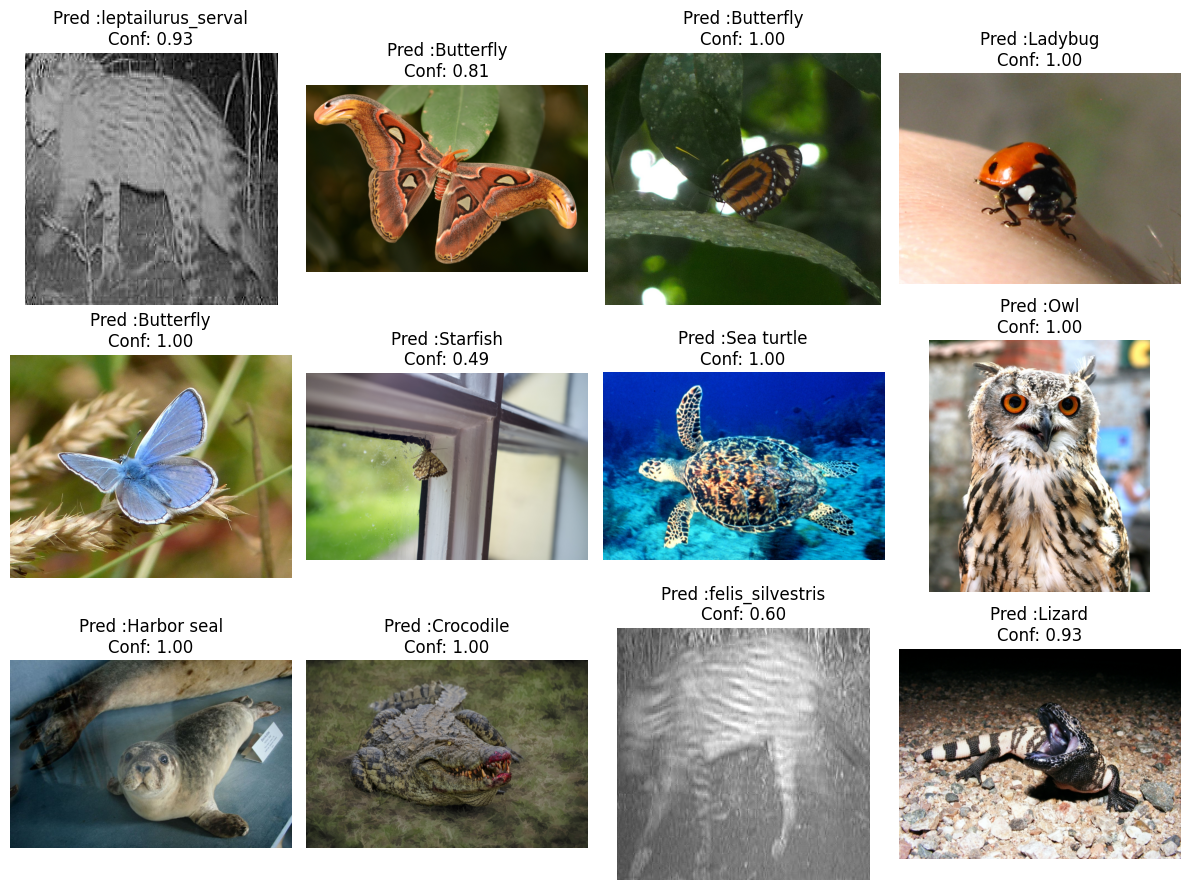

In [7]:
%matplotlib inline
import os, glob, random
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn.functional as F
import math

# Path to test dataset (root folder containing class subfolders)
test_folder = r"D:\Downloads\Datasets\Imbalanced_dataste_split\test"

# Get all image paths
image_files = glob.glob(os.path.join(test_folder, "*", "*.jpg"))

# 🔹 Number of images to display
num_images = 12   # change as you like

# 🔹 Number of columns in the grid
cols = 4          # more columns = more images in a row

# Pick random images
sample_images = random.sample(image_files, num_images)

# 🔹 Rows will adjust automatically
rows = math.ceil(num_images / cols)
plt.figure(figsize=(3 * cols, 3 * rows))  # dynamic figure size

for i, img_path in enumerate(sample_images):
    img = Image.open(img_path).convert("RGB")
    x = val_tfms(img).unsqueeze(0)  # preprocess

    with torch.no_grad():
        outputs = model(x)
        probs = F.softmax(outputs, dim=1)
        conf, pred_class = torch.max(probs, 1)

    pred_label = train_data.classes[pred_class.item()]

    plt.subplot(rows, cols, i+1)  # rows x cols grid
    plt.imshow(img)
    plt.title(f"Pred :{pred_label}\nConf: {conf.item():.2f}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [9]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Using device: cpu



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


=== OVERALL METRICS ===
Test Accuracy: 0.6955 (69.55%)
Macro Precision: 0.6733 (67.33%)
Macro Recall: 0.6458 (64.58%)
Macro F1-Score: 0.6242 (62.42%)


=== DETAILED CLASSIFICATION REPORT ===
                          precision    recall  f1-score   support

                    Bear       0.67      0.60      0.63        10
              Brown bear       0.83      0.83      0.83        12
               Butterfly       0.89      0.71      0.79       188
                   Camel       1.00      0.62      0.77         8
                  Canary       0.67      0.67      0.67        12
             Caterpillar       0.82      0.53      0.64        51
                    Cats       0.89      0.96      0.93        26
                  Cattle       0.30      0.43      0.35         7
               Centipede       0.49      0.95      0.65        21
                 Cheetah       0.50      0.21      0.30        14
                 Chicken       0.79      0.75      0.77        40
                

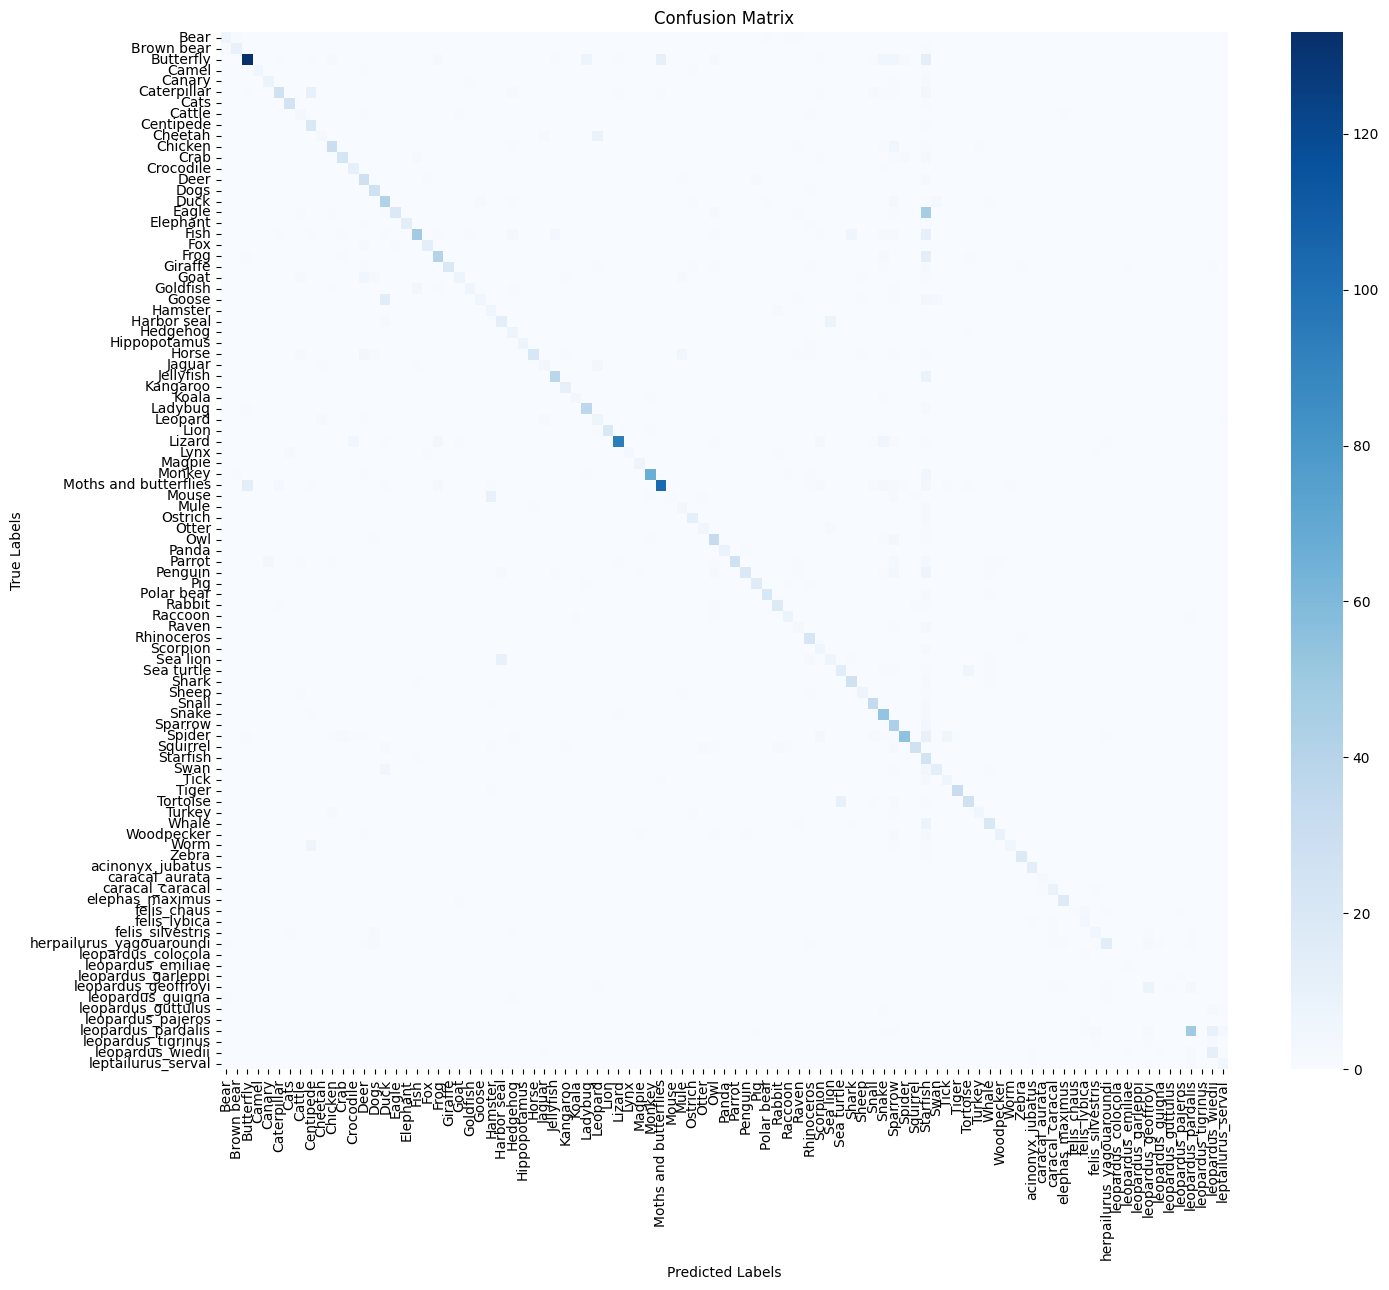

=== PER-CLASS ACCURACY ===
Bear: 0.6000 (60.00%)
Brown bear: 0.8333 (83.33%)
Butterfly: 0.7074 (70.74%)
Camel: 0.6250 (62.50%)
Canary: 0.6667 (66.67%)
Caterpillar: 0.5294 (52.94%)
Cats: 0.9615 (96.15%)
Cattle: 0.4286 (42.86%)
Centipede: 0.9524 (95.24%)
Cheetah: 0.2143 (21.43%)
Chicken: 0.7500 (75.00%)
Crab: 0.7188 (71.88%)
Crocodile: 0.9167 (91.67%)
Deer: 0.8235 (82.35%)
Dogs: 0.9643 (96.43%)
Duck: 0.7636 (76.36%)
Eagle: 0.2603 (26.03%)
Elephant: 0.8125 (81.25%)
Fish: 0.5714 (57.14%)
Fox: 0.8125 (81.25%)
Frog: 0.6833 (68.33%)
Giraffe: 0.6452 (64.52%)
Goat: 0.3333 (33.33%)
Goldfish: 0.4286 (42.86%)
Goose: 0.1667 (16.67%)
Hamster: 0.7500 (75.00%)
Harbor seal: 0.5833 (58.33%)
Hedgehog: 0.8750 (87.50%)
Hippopotamus: 0.8750 (87.50%)
Horse: 0.5250 (52.50%)
Jaguar: 0.4000 (40.00%)
Jellyfish: 0.8085 (80.85%)
Kangaroo: 1.0000 (100.00%)
Koala: 0.6667 (66.67%)
Ladybug: 0.9250 (92.50%)
Leopard: 0.5385 (53.85%)
Lion: 0.9091 (90.91%)
Lizard: 0.7833 (78.33%)
Lynx: 0.3750 (37.50%)
Magpie: 1.0000 (100.

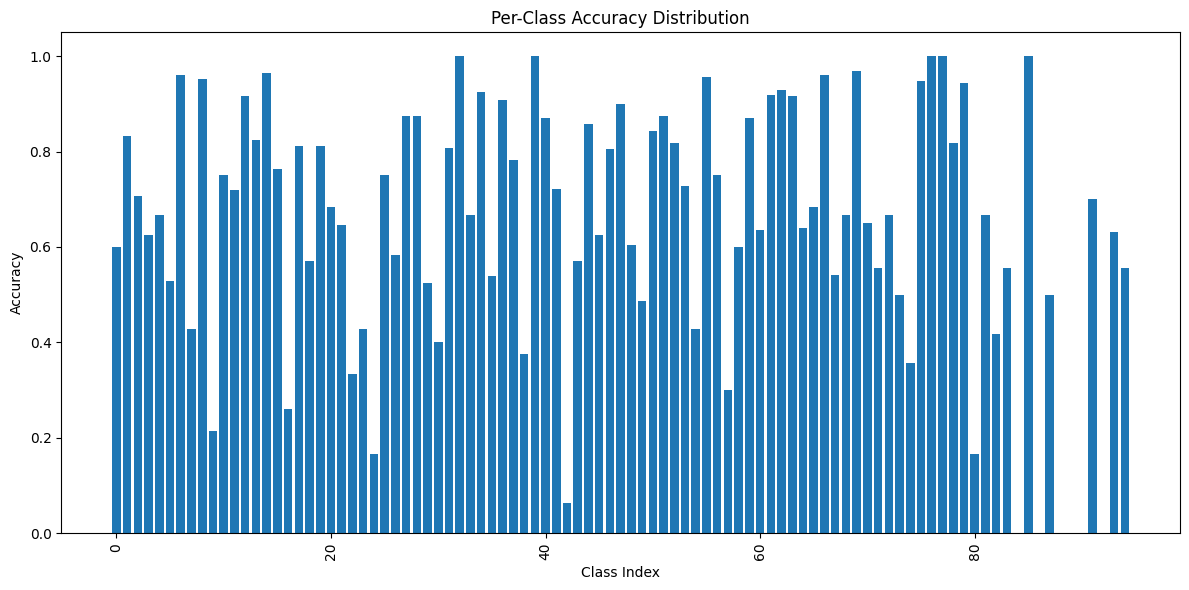

In [15]:
# Install sklearn if not already installed
%pip install seaborn
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load your best model
model = models.resnet101(pretrained=False)
num_classes =  95 # Update if different
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load("best_resnet101_Imbalanced.pth", map_location=device))
model = model.to(device)
model.eval()

# Load test data (use the same transform as your validation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_data = datasets.ImageFolder(r"D:\Downloads\Datasets\Imbalanced_dataste_split\test", transform=test_transform)
test_loader = DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)

# Get class names
class_names = test_data.classes

# Evaluation
all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        _, preds = torch.max(outputs, 1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Convert to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

# Calculate metrics
accuracy = np.mean(all_preds == all_labels)
precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)

print("=== OVERALL METRICS ===")
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Macro Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Macro Recall: {recall:.4f} ({recall*100:.2f}%)")
print(f"Macro F1-Score: {f1:.4f} ({f1*100:.2f}%)")
print("\n")

# Classification report
print("=== DETAILED CLASSIFICATION REPORT ===")
print(classification_report(all_labels, all_preds, target_names=class_names, zero_division=0))

# Confusion matrix
plt.figure(figsize=(15, 13))
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Per-class accuracy
class_correct = np.zeros(len(class_names))
class_total = np.zeros(len(class_names))

for i in range(len(all_labels)):
    class_idx = all_labels[i]
    class_total[class_idx] += 1
    if all_labels[i] == all_preds[i]:
        class_correct[class_idx] += 1

class_accuracy = class_correct / class_total

print("=== PER-CLASS ACCURACY ===")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {class_accuracy[i]:.4f} ({class_accuracy[i]*100:.2f}%)")

# Plot class accuracy distribution
plt.figure(figsize=(12, 6))
plt.bar(range(len(class_names)), class_accuracy)
plt.xlabel('Class Index')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Selected Classes: ['felis_chaus', 'Deer', 'Eagle', 'Giraffe', 'Crab', 'Kangaroo']


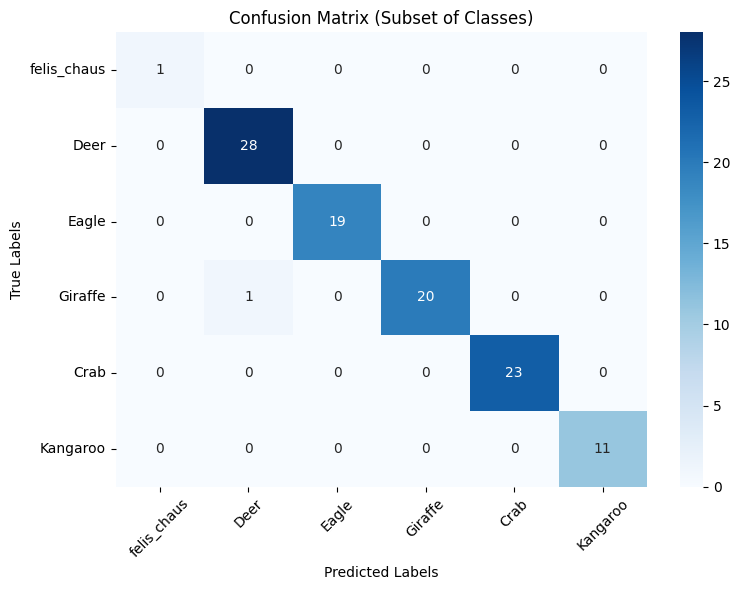

In [22]:
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Pick 6 random classes (or define manually)
selected_classes = random.sample(class_names, 6)
print("Selected Classes:", selected_classes)

# Get their indices
selected_indices = [class_names.index(c) for c in selected_classes]

# Mask for samples where TRUE label is in selected classes
mask = np.isin(all_labels, selected_indices)

# Apply mask to both
filtered_labels = all_labels[mask]
filtered_preds = all_preds[mask]

# Now also mask out predictions that are not in selected_indices
valid_mask = np.isin(filtered_preds, selected_indices)
filtered_labels = filtered_labels[valid_mask]
filtered_preds = filtered_preds[valid_mask]

# Remap indices to 0...len(selected_classes)-1
mapping = {old_idx: new_idx for new_idx, old_idx in enumerate(selected_indices)}
filtered_labels = np.array([mapping[l] for l in filtered_labels])
filtered_preds = np.array([mapping[p] for p in filtered_preds])

# Confusion matrix
cm_small = confusion_matrix(filtered_labels, filtered_preds, labels=range(len(selected_classes)))

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_small, annot=True, fmt='d', cmap='Blues',
            xticklabels=selected_classes, yticklabels=selected_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Subset of Classes)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Using device: cpu


c:\Users\Shashank S M\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Shashank S M\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


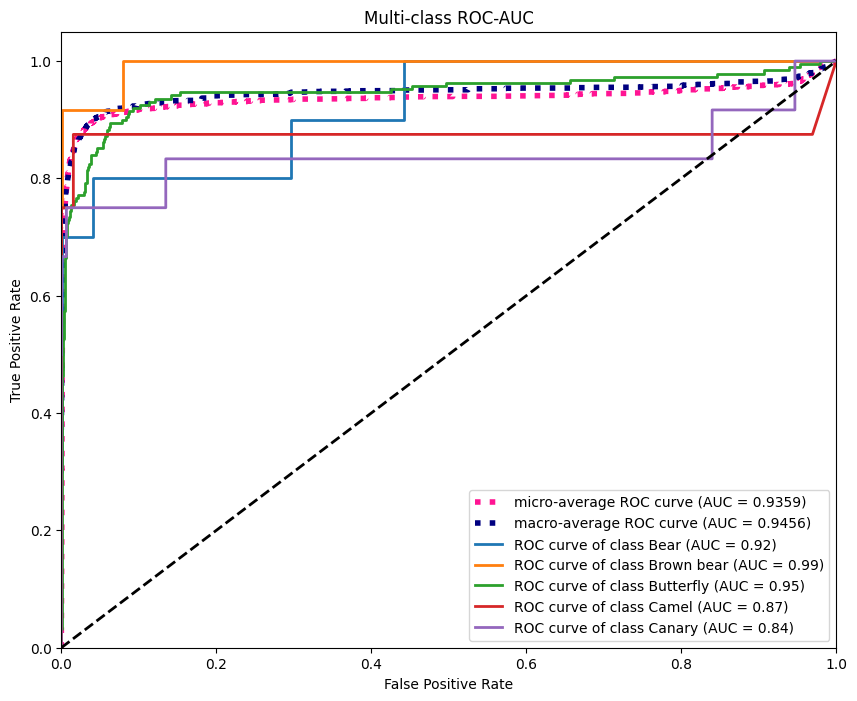

=== AUC SCORES ===
Micro-average AUC: 0.9359
Macro-average AUC: 0.9456
Class Bear AUC: 0.9218
Class Brown bear AUC: 0.9932
Class Butterfly AUC: 0.9479
Class Camel AUC: 0.8749
Class Canary AUC: 0.8393
Class Caterpillar AUC: 0.9332
Class Cats AUC: 0.9621
Class Cattle AUC: 0.9837
Class Centipede AUC: 0.9510
Class Cheetah AUC: 0.9930


In [15]:
# ROC-AUC for Multi-class Classification
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix, precision_score, 
    recall_score, f1_score, roc_curve, auc, roc_auc_score
)
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn as nn
from sklearn.preprocessing import label_binarize

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load your best model
model = models.resnet101(pretrained=False)
num_classes = 95  # Update if different
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load("best_resnet101_Imbalanced.pth", map_location=device))
model = model.to(device)
model.eval()

# Load test data (same transform as validation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_data = datasets.ImageFolder(r"D:\Downloads\Datasets\Imbalanced_dataste_split\test", transform=test_transform)
test_loader = DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)

class_names = test_data.classes

# Evaluation loop
all_preds, all_labels, all_probs = [], [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

# === ROC-AUC ===
# Binarize labels for multi-class ROC
y_test_bin = label_binarize(all_labels, classes=np.arange(num_classes))

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], all_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), all_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= num_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# === PLOT ROC CURVES ===
plt.figure(figsize=(10, 8))

# Micro-average
plt.plot(fpr["micro"], tpr["micro"],
         label=f'micro-average ROC curve (AUC = {roc_auc["micro"]:.4f})',
         color='deeppink', linestyle=':', linewidth=4)

# Macro-average
plt.plot(fpr["macro"], tpr["macro"],
         label=f'macro-average ROC curve (AUC = {roc_auc["macro"]:.4f})',
         color='navy', linestyle=':', linewidth=4)

# Plot few individual classes (not all 95, else messy)
for i in range(min(5, num_classes)):  # show only first 5 classes
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC-AUC')
plt.legend(loc="lower right")
plt.show()

# Print AUC summary
print("=== AUC SCORES ===")
print(f"Micro-average AUC: {roc_auc['micro']:.4f}")
print(f"Macro-average AUC: {roc_auc['macro']:.4f}")
for i in range(min(10, num_classes)):  # print few classes only
    print(f"Class {class_names[i]} AUC: {roc_auc[i]:.4f}")


In [16]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Sensitivity (Recall) and Specificity per class
sensitivity_per_class = []
specificity_per_class = []

for i in range(len(class_names)):
    TP = cm[i, i]
    FN = cm[i, :].sum() - TP
    FP = cm[:, i].sum() - TP
    TN = cm.sum() - (TP + FN + FP)

    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    sensitivity_per_class.append(sensitivity)
    specificity_per_class.append(specificity)

    print(f"{class_names[i]} -> Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

# Macro averages
avg_sensitivity = np.mean(sensitivity_per_class)
avg_specificity = np.mean(specificity_per_class)

print("\n=== OVERALL AVERAGES ===")
print(f"Macro Sensitivity (Recall): {avg_sensitivity:.4f}")
print(f"Macro Specificity: {avg_specificity:.4f}")


Bear -> Sensitivity: 0.6000, Specificity: 0.9988
Brown bear -> Sensitivity: 0.8333, Specificity: 0.9992
Butterfly -> Sensitivity: 0.7074, Specificity: 0.9929
Camel -> Sensitivity: 0.6250, Specificity: 1.0000
Canary -> Sensitivity: 0.6667, Specificity: 0.9984
Caterpillar -> Sensitivity: 0.5294, Specificity: 0.9976
Cats -> Sensitivity: 0.9615, Specificity: 0.9988
Cattle -> Sensitivity: 0.4286, Specificity: 0.9973
Centipede -> Sensitivity: 0.9524, Specificity: 0.9918
Cheetah -> Sensitivity: 0.2143, Specificity: 0.9988
Chicken -> Sensitivity: 0.7500, Specificity: 0.9968
Crab -> Sensitivity: 0.7188, Specificity: 0.9984
Crocodile -> Sensitivity: 0.9167, Specificity: 0.9977
Deer -> Sensitivity: 0.8235, Specificity: 0.9921
Dogs -> Sensitivity: 0.9643, Specificity: 0.9965
Duck -> Sensitivity: 0.7636, Specificity: 0.9889
Eagle -> Sensitivity: 0.2603, Specificity: 0.9996
Elephant -> Sensitivity: 0.8125, Specificity: 1.0000
Fish -> Sensitivity: 0.5714, Specificity: 0.9964
Fox -> Sensitivity: 0.812